In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

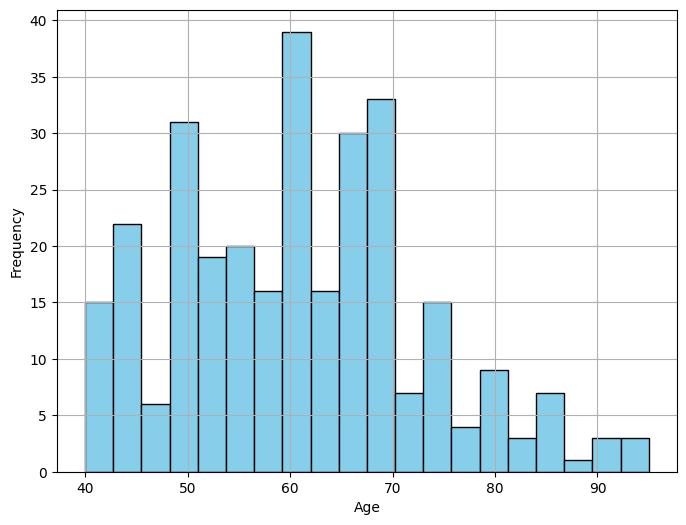

In [11]:
# 1. What is the distribution of age among heart failure patients in the dataset?
age_data = df['age']

plt.figure(figsize= (8,6))
plt.hist(age_data, bins= 20, edgecolor= 'black', color= 'skyblue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

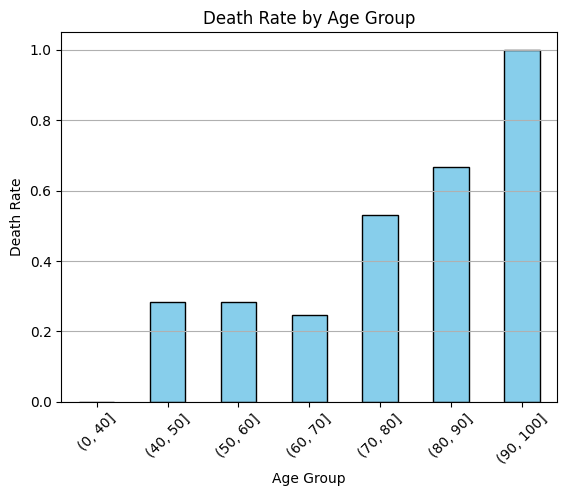

In [27]:
# 2.  How does the death rate vary with age?

# Define age groups
age_groups = pd.cut(df['age'], bins= [0,40,50,60,70,80,90,100])

# Calculate the death rate for each group
death_rate_by_age = df.groupby(age_groups)['DEATH_EVENT'].mean()

death_rate_by_age.plot(kind= 'bar', color= 'skyblue', edgecolor= 'black')
plt.title("Death Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.xticks(rotation= 45)
plt.grid(axis= 'y')
plt.show()

The male patients percentage in dataset is 64.88294314381271 and 
 The female patients percentage in dataset is 35.11705685618729


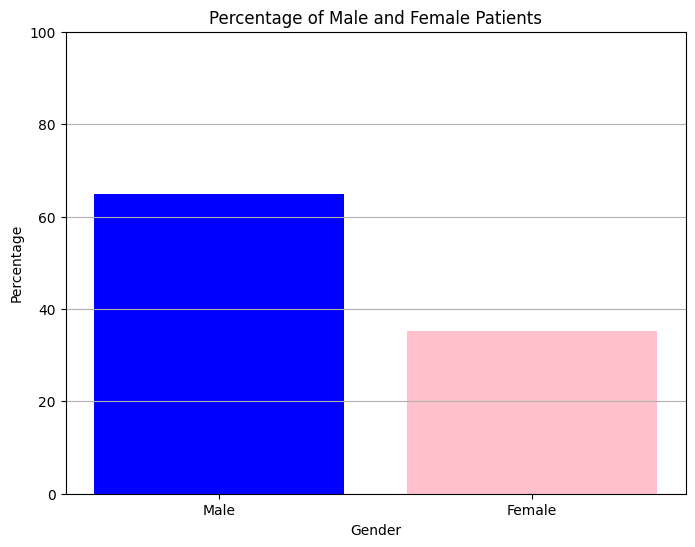

In [116]:
# 3. What is the percentage of male and female patients in the dataset?
sex_per = df['sex'].value_counts(normalize = True)
sex_percentage = sex_per * 100
print(f"The male patients percentage in dataset is {sex_percentage[1]} and \n The female patients percentage in dataset is {sex_percentage[0]}")


# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], sex_percentage, color=['blue', 'pink'])
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

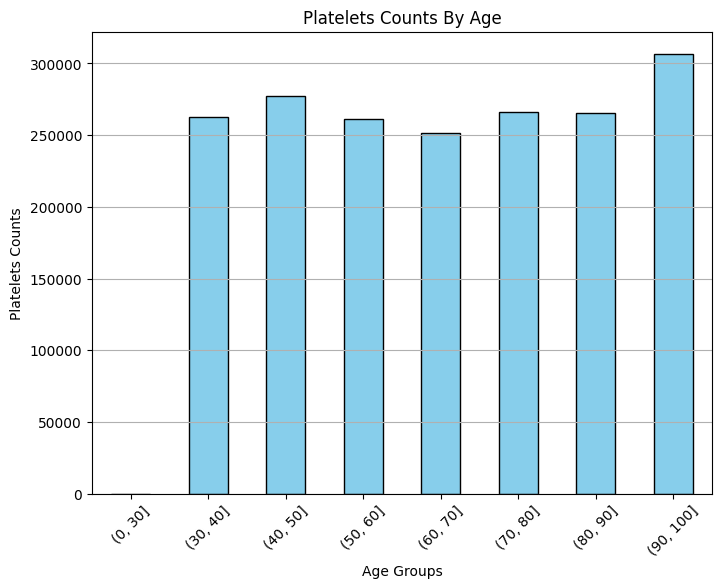

In [55]:
# 4. How does the platelets counts vary among different age group?
age_groups = pd.cut(df['age'], bins = [0,30,40,50,60,70,80,90,100])

platelets_count_by_age = df.groupby(age_groups)["platelets"].mean()

plt.figure(figsize= (8,6))
platelets_count_by_age.plot(kind= 'bar', color= 'skyblue', edgecolor= 'black')
plt.title("Platelets Counts By Age")
plt.xlabel("Age Groups")
plt.ylabel("Platelets Counts")
plt.xticks(rotation= 45)
plt.grid(axis= 'y')
plt.show()

Correlation between creatinine and sodium levels is  -0.1890952100911741


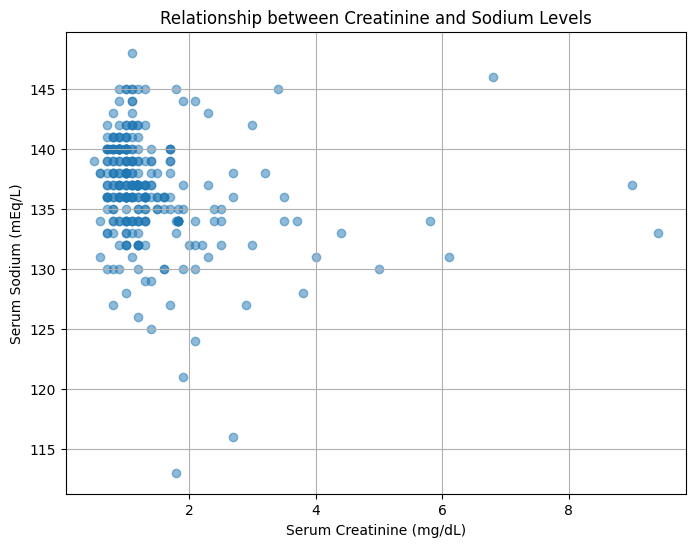

In [69]:
# Is there is a correlation between creatinine and sodium levels in the blood ?
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print("Correlation between creatinine and sodium levels is ", correlation)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['serum_creatinine'], df['serum_sodium'], alpha=0.5)
plt.title('Relationship between Creatinine and Sodium Levels')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Serum Sodium (mEq/L)')
plt.grid(True)
plt.show()

If it is close to 1, it indicates a strong positive correlation (as one variable increases, the other variable tends to also increase).
If it is close to -1, it indicates a strong negative correlation (as one variable increases, the other variable tends to decrease).
If it is close to 0, it indicates little to no linear relationship between the variables

Percentage of male patients with high blood pressure: 31.443298969072163
Percentage of female patients with high blood pressure: 41.904761904761905


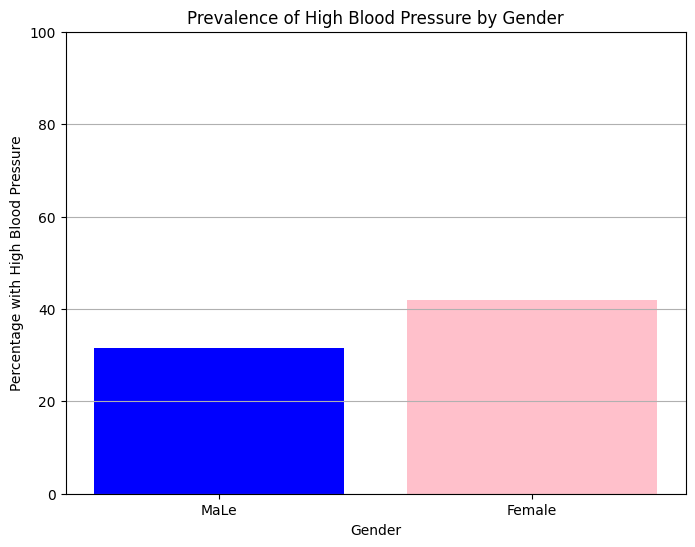

In [68]:
# 6. How does the prevalance of high blood pressure differ between male and female patients?

# Count the number of male and female patients with high blood pressure
high_bp_counts = df.groupby('sex')['high_blood_pressure'].value_counts(normalize=True)

# Extract the percentage of patients with high blood pressure in each gender group
male_high_bp_percentage = high_bp_counts[1][1] * 100  # Male patients with high blood pressure
female_high_bp_percentage = high_bp_counts[0][1] * 100  # Female patients with high blood pressure

print("Percentage of male patients with high blood pressure:", male_high_bp_percentage)
print("Percentage of female patients with high blood pressure:", female_high_bp_percentage)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['MaLe', 'Female'], [male_high_bp_percentage, female_high_bp_percentage], color=['blue', 'pink'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage with High Blood Pressure')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


Percentage of heart failure occurrences among non-smokers: 32.51231527093596
Percentage of heart failure occurrences among smokers: 31.25


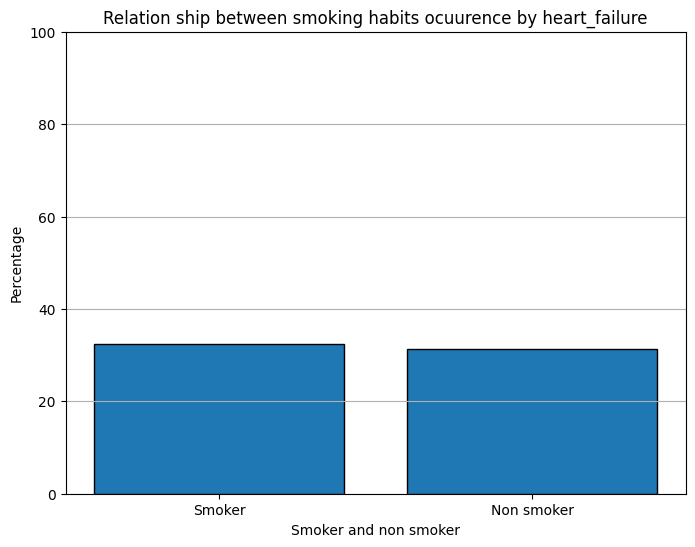

In [82]:
# 7. What is the relationship between smoking habits and the occurence of heart failure?
heart_failure = df.groupby('smoking')['DEATH_EVENT'].value_counts(normalize= True)

heart_failure
non_smoker_hf_percentage = heart_failure[0][1] * 100 #Percentage of heart_fail by non smoking
smoker_hf_percentage = heart_failure[1][1] * 100  # Percenatge of heart_fail by smoking

print("Percentage of heart failure occurrences among non-smokers:", non_smoker_hf_percentage)
print("Percentage of heart failure occurrences among smokers:", smoker_hf_percentage)

plt.figure(figsize= (8,6))
plt.bar(['Smoker', 'Non smoker'], [non_smoker_hf_percentage, smoker_hf_percentage],edgecolor= 'black')
plt.title("Relation ship between smoking habits ocuurence by heart_failure")
plt.xlabel("Smoker and non smoker")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.grid(axis= 'y')
plt.show()

<Figure size 800x600 with 0 Axes>

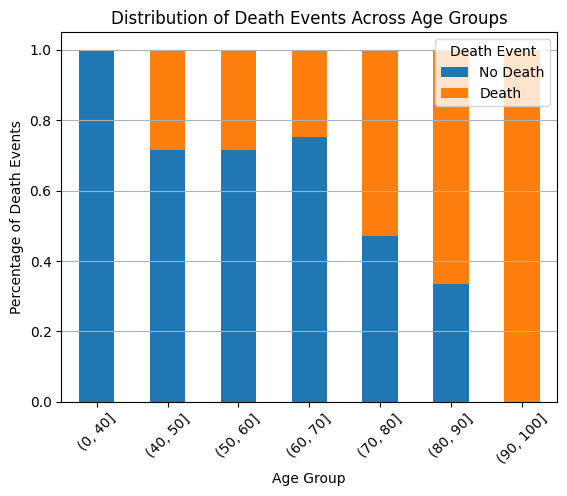

In [98]:
# 8. Are there any noticeable patterns in the distribution of death events across different age groups?
# Define age groups
age_groups = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 80, 90, 100])

# Calculate the distribution of death events in each age group
death_event_counts = df.groupby(age_groups)['DEATH_EVENT'].value_counts(normalize=True).unstack()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
death_event_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Death Events')
plt.xticks(rotation=45)
plt.legend(title='Death Event', labels=['No Death', 'Death'])
plt.grid(axis='y')
plt.show()

T-statistic: -0.08358970647234736
P-value: 0.9334389630426103


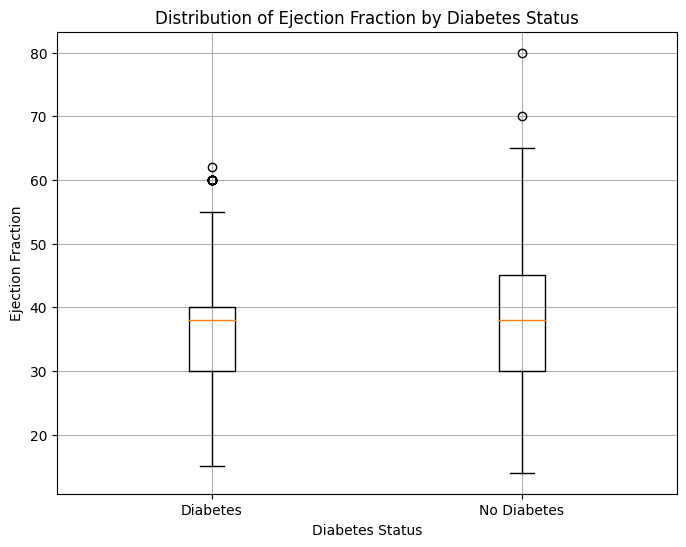

In [102]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?
from scipy.stats import ttest_ind
import pandas as pd

# Separate data for patients with and without diabetes
ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform t-test
t_statistic, p_value = ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Separate data for patients with and without diabetes
ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([ejection_fraction_diabetes, ejection_fraction_no_diabetes], labels=['Diabetes', 'No Diabetes'])
plt.title('Distribution of Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.grid(True)
plt.show()

In [41]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

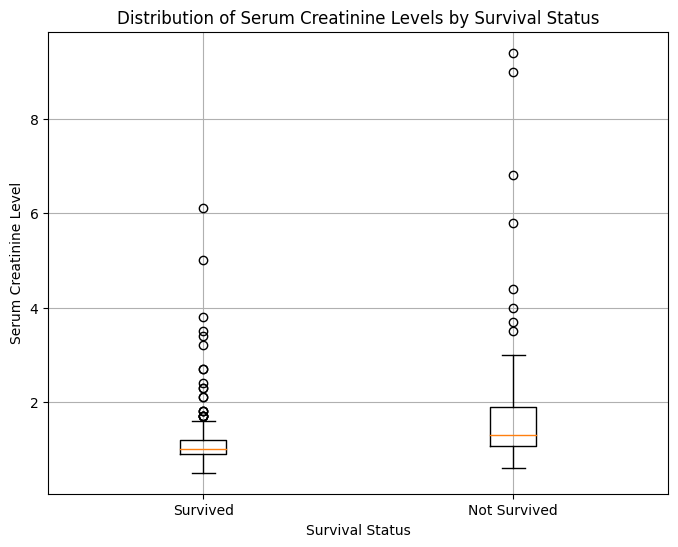

In [112]:
 # 10. How does the serum creatinine level vary between between patients who survived and those who did not?

# Separate data for patients who survived and those who did not
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([creatinine_survived, creatinine_not_survived], labels=['Survived', 'Not Survived'])
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Serum Creatinine Level')
plt.grid(True)
plt.show()